In [20]:
import util as u
# model_path="rec_sage_ns2.pt"
# model_path="phonesage_naug_avg.pt"
model_path="phonesage_naug_norm.pt"
# model_path="phonesage_naug_norm_continue.pt"
pkl_folder="pkl"
dim_red_folder="dimension reduction"

dim_reds = ["tsne","pca"]
datasets = ["train","test","reference"]

u.initialize([dim_red_folder])
for dim_red in dim_reds:
    u.initialize(["%s/%s"%(dim_red_folder, dim_red)])
    for dataset in datasets:
        u.initialize(["%s/%s/%s"%(dim_red_folder, dim_red, dataset)])

In [19]:
u.initialize(['a/b/c'])

In [2]:
ref_set_name = "%s/ref_data.pkl"%pkl_folder
ref_curve_label_name="%s/ref_curve_label.pkl"%pkl_folder
ref_label_name= "%s/ref_label.pkl"%pkl_folder
ref_dist_mat_name="%s/ref_dist_mat.pkl"%pkl_folder
ref_set, ref_curve_label, ref_label, ref_dist_mat=\
u.load_set(ref_set_name, ref_curve_label_name,\
           ref_label_name, ref_dist_mat_name)

In [3]:
test_set_name = "%s/test_data_no_aug.pkl"%pkl_folder
test_curve_label_name="%s/test_curve_label_no_aug.pkl"%pkl_folder
test_label_name= "%s/test_label_no_aug.pkl"%pkl_folder
test_dist_mat_name="%s/test_dist_mat_no_aug.pkl"%pkl_folder
test_set, test_curve_label, test_label, test_dist_mat=\
u.load_set(test_set_name, test_curve_label_name,\
           test_label_name, test_dist_mat_name)

In [4]:
train_set_name = "%s/train_data_no_aug.pkl"%pkl_folder
train_curve_label_name="%s/train_curve_label_no_aug.pkl"%pkl_folder
train_label_name= "%s/train_label_no_aug.pkl"%pkl_folder
train_dist_mat_name="%s/train_dist_mat_no_aug.pkl"%pkl_folder
train_set, train_curve_label, train_label, train_dist_mat=\
u.load_set(train_set_name, train_curve_label_name,\
           train_label_name, train_dist_mat_name)

In [5]:
mode="norm"
train_latent_vec = u.get_latent(train_set, train_curve_label, \
                              train_dist_mat, model_path, mode)#this is slow
test_latent_vec = u.get_latent(test_set, test_curve_label, \
                             test_dist_mat, model_path, mode)#this is slow
ref_latent_vec=u.get_latent(ref_set, ref_curve_label,\
                           ref_dist_mat, model_path, mode)

In [6]:
#this step is very slow, should run separately
#use letent2plot will run every single time

latent_vec=test_latent_vec
latent_vec=train_latent_vec
train_tsne3vector=u.vec2plot(train_latent_vec, mode="tsne", dimension=3)
test_tsne3vector=u.vec2plot(test_latent_vec, mode="tsne", dimension=3)
ref_tsne3vector=u.vec2plot(ref_latent_vec, mode="tsne", dimension=3)

In [7]:
u.dump_item(train_latent_vec,"%s/train_latent_norm2.pkl"%pkl_folder)
u.dump_item(test_latent_vec,"%s/test_latent_norm2.pkl"%pkl_folder)
u.dump_item(ref_latent_vec,"%s/ref_latent_norm2.pkl"%pkl_folder)

u.dump_item(train_tsne3vector,"%s/train_tsne3_norm2.pkl"%pkl_folder)
u.dump_item(test_tsne3vector,"%s/test_tsne3_norm2.pkl"%pkl_folder)
u.dump_item(ref_tsne3vector,"%s/ref_tsne3_norm2.pkl"%pkl_folder)

In [21]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

dataset="train"
vector=train_tsne3vector
for i in range(18):
    for j in range(18):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*10,9,j*10))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/tsne/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()
        
dataset="test"    
vector=test_tsne3vector
for i in range(18):
    for j in range(18):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*10,9,j*10))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/tsne/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()

dataset="reference"
vector=ref_tsne3vector
for i in range(18):
    for j in range(18):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*10,9,j*10))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/tsne/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()

In [23]:
#3D PCA plot
train_pca3vector=u.vec2plot(train_latent_vec, mode="pca", dimension=3)
# test_pca3vector=u.vec2plot(test_latent_vec, mode="pca", dimension=3)
ref_pca3vector=u.vec2plot(ref_latent_vec, mode="pca", dimension=3)
u.dump_item(train_pca3vector,"%s/train_pca3_norm2.pkl"%pkl_folder)
# u.dump_item(test_pca3vector,"%s/test_pca3_norm2.pkl"%pkl_folder)
u.dump_item(ref_pca3vector,"%s/ref_pca3_norm2.pkl"%pkl_folder)

In [25]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

dataset="train"
vector=train_pca3vector
space = 20
count = int(180/space)
for i in range(count):
    for j in range(count):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*space,9,j*space))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/pca/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()
        
dataset="test"    
vector=test_pca3vector
for i in range(count):
    for j in range(count):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*space,9,j*space))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/pca/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()

dataset="reference"
vector=ref_pca3vector
for i in range(count):
    for j in range(count):
        threshold=int(vector.shape[0]/2)
        u.plot_vec(vector=vector, threshold=threshold, angles=(i*space,9,j*space))
        red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
        blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
        plt.legend(handles=[red_patch, blue_patch], fontsize=15)
        plt.savefig("%s/pca/%s/%s %s"%(dim_red_folder,dataset,i,j))
        plt.close()

In [30]:
#2D PCA plot
train_pca2vector=u.vec2plot(train_latent_vec, mode="pca", dimension=2)
test_pca2vector=u.vec2plot(test_latent_vec, mode="pca", dimension=2)
ref_pca2vector=u.vec2plot(ref_latent_vec, mode="pca", dimension=2)

In [31]:
u.dump_item(train_pca2vector,"%s/train_pca2_norm2.pkl"%pkl_folder)
u.dump_item(test_pca2vector,"%s/test_pca2_norm2.pkl"%pkl_folder)
u.dump_item(ref_pca2vector,"%s/ref_pca2_norm2.pkl"%pkl_folder)

In [32]:
dataset="train"
vector=train_pca2vector

plt.figure(figsize=(10,10))
threshold=int(vector.shape[0]/2)
u.plot_vec(vector=vector, threshold=threshold)
red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
plt.legend(handles=[red_patch, blue_patch], fontsize=15)
plt.savefig("%s/pca/%s"%(dim_red_folder,dataset))
plt.close()


dataset="test"
vector=test_pca2vector

plt.figure(figsize=(10,10))
threshold=int(vector.shape[0]/2)
u.plot_vec(vector=vector, threshold=threshold)
red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
plt.legend(handles=[red_patch, blue_patch], fontsize=15)
plt.savefig("%s/pca/%s"%(dim_red_folder,dataset))
plt.close()

dataset="reference"
vector=ref_pca2vector

plt.figure(figsize=(10,10))
threshold=int(vector.shape[0]/2)
u.plot_vec(vector=vector, threshold=threshold)
red_patch = mpatches.Patch(color=[1,0,0], label='iphone')
blue_patch = mpatches.Patch(color=[0,0,1], label='samsung')
plt.legend(handles=[red_patch, blue_patch], fontsize=15)
plt.savefig("%s/pca/%s"%(dim_red_folder,dataset))
plt.close()

In [78]:
a=np.array([[1,2,3],[4,5,6]])
avg=a.mean(axis=0)
avg
a-avg.T

array([[-1.5, -1.5, -1.5],
       [ 1.5,  1.5,  1.5]])

In [74]:
test_latent_vec.shape
# test_latent_vec

(2000, 8)

In [76]:
m.shape

(2000,)

In [75]:
m=test_latent_vec.mean(axis=0)
# v=test_latent_vec.var(axis=1)

In [44]:
norm_test=test_latent_vec-m

In [79]:
import numpy as np
cor=norm_test.T.dot(norm_test)/2000
w,v=np.linalg.eig(cor)
w;v

array([[ 0.3419918 ,  0.1509098 ,  0.49537402, -0.12867732,  0.7407246 ,
        -0.12897818, -0.17932159,  0.02915512],
       [-0.34248304,  0.57555944,  0.07166184, -0.05770789, -0.05437848,
         0.0083188 , -0.04074045,  0.7336791 ],
       [-0.32981008,  0.5400169 ,  0.11349465, -0.17314285,  0.07937603,
         0.39989597,  0.20765382, -0.5894151 ],
       [ 0.42633706,  0.22334133,  0.28976047, -0.07466538, -0.54658556,
         0.21529327, -0.5713835 , -0.08504869],
       [ 0.21104224,  0.11478696,  0.51770014,  0.4593355 , -0.27261484,
        -0.17269716,  0.599214  ,  0.00905588],
       [-0.18030864,  0.31870148, -0.11333971,  0.14382638, -0.07403604,
        -0.8056544 , -0.27087042, -0.32319513],
       [ 0.41775206,  0.1745466 , -0.21932305, -0.7025565 , -0.15215357,
        -0.2561699 ,  0.40384203,  0.03829322],
       [ 0.4729082 ,  0.39905483, -0.5689157 ,  0.46829244,  0.200905  ,
         0.18028064,  0.03268348,  0.01476628]], dtype=float32)

In [80]:
w

array([1.6565691e+01, 8.9421207e-01, 2.1383977e-01, 1.5961899e-01,
       6.9249347e-02, 4.1382760e-02, 2.1628357e-02, 3.8949687e-03],
      dtype=float32)

In [83]:
v[:,0]

array([ 0.3419918 , -0.34248304, -0.32981008,  0.42633706,  0.21104224,
       -0.18030864,  0.41775206,  0.4729082 ], dtype=float32)

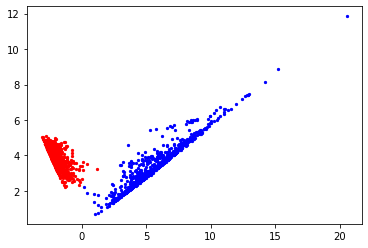

In [85]:
x=test_latent_vec.dot(v[:,0].T)
y=test_latent_vec.dot(v[:,1].T)
plt.scatter(x[:1000],y[:1000],color=[1,0,0],s=5)
plt.scatter(x[1000:],y[1000:],color=[0,0,1],s=5)

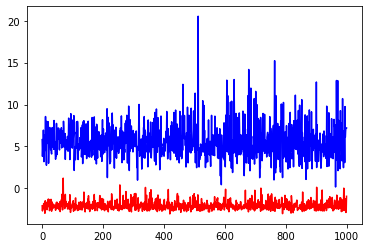

In [88]:
plt.plot(x[:1000],color=[1,0,0])
plt.plot(x[1000:],color=[0,0,1])

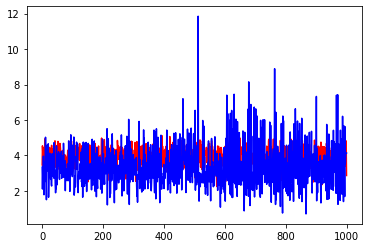

In [89]:
plt.plot(y[:1000],color=[1,0,0])
plt.plot(y[1000:],color=[0,0,1])

In [19]:
pca3vector=u.vec2plot(latent_vec, mode="pca", dimension=3)

In [22]:
for i in range(18):
    for j in range(18):
        threshold=int(pca3vector.shape[0]/2)
        u.plot_vec(vector=pca3vector, threshold=threshold, angles=(i*10,9,j*10))
        plt.savefig("%s/pca/%s %s"%(dim_red_folder,i,j))
        plt.close()

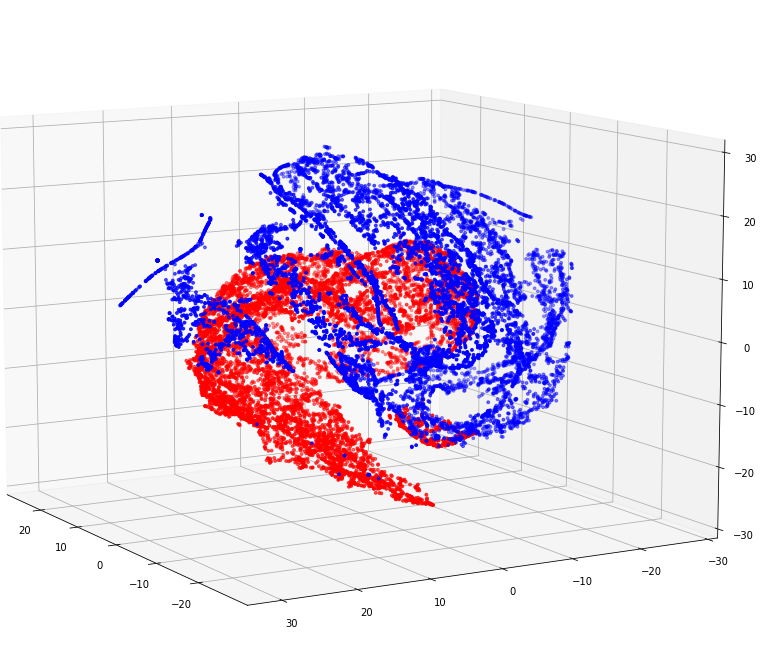

In [30]:
import matplotlib.pyplot as plt
latent_vec=train_latent_vec
# latent_vec=test_latent_vec

# model_path="rec_sage_ns2.pt"
# u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
#                , threshold=None, angles=(20,9,3))

# model_path="rec_sage_ns2.pt"
# u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
#                , threshold=None, angles=(170,9,2))
# u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
#                , threshold=None, angles=(130,9,1))
# plt.show()
u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
               , threshold=None, angles=(150,8,10))
plt.show()
# u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
#                , threshold=None, angles=(170,9,1))
# plt.show()
# azim, dist, elev=angles

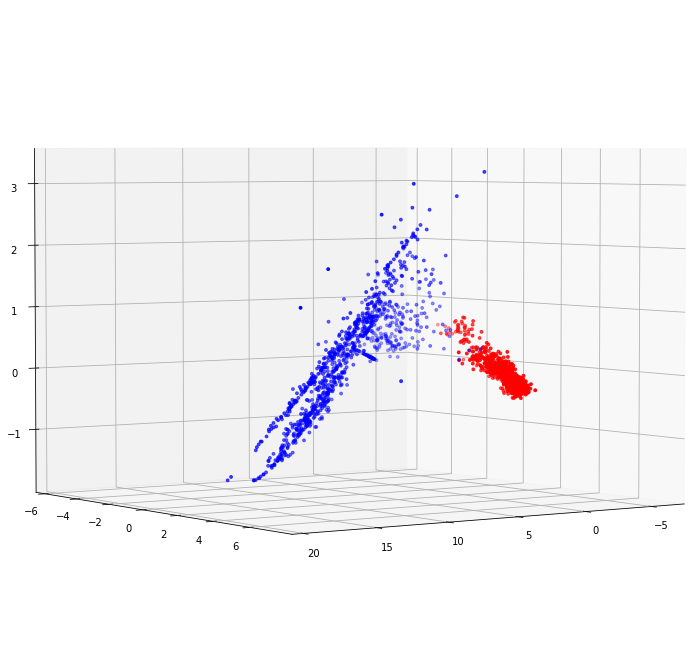

In [6]:
# model_path="rec_sage_ns2.pt"
u.latent2plot(latent_vec=latent_vec, mode="pca", dimension=3\
               , threshold=None, angles=(55,9,3))

plt.show()

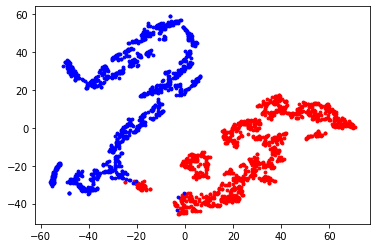

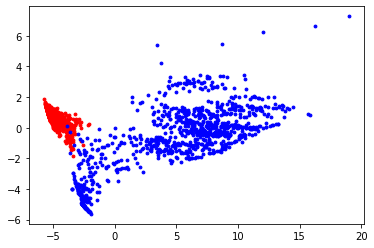

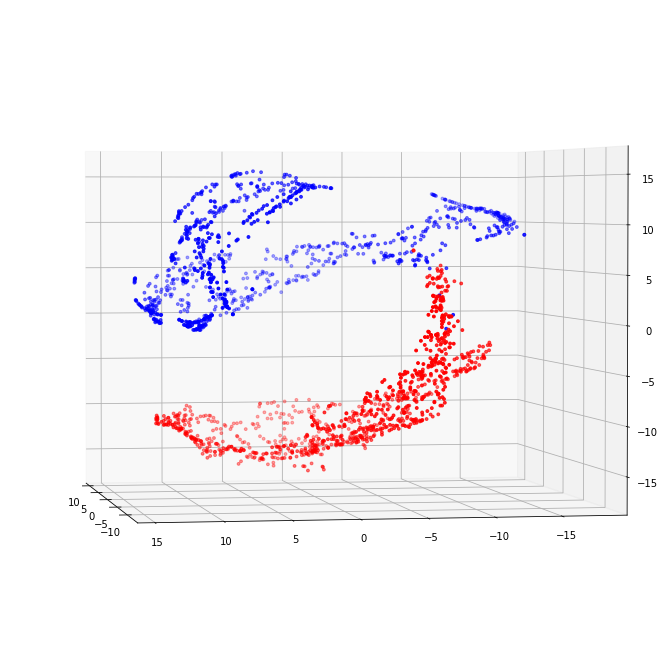

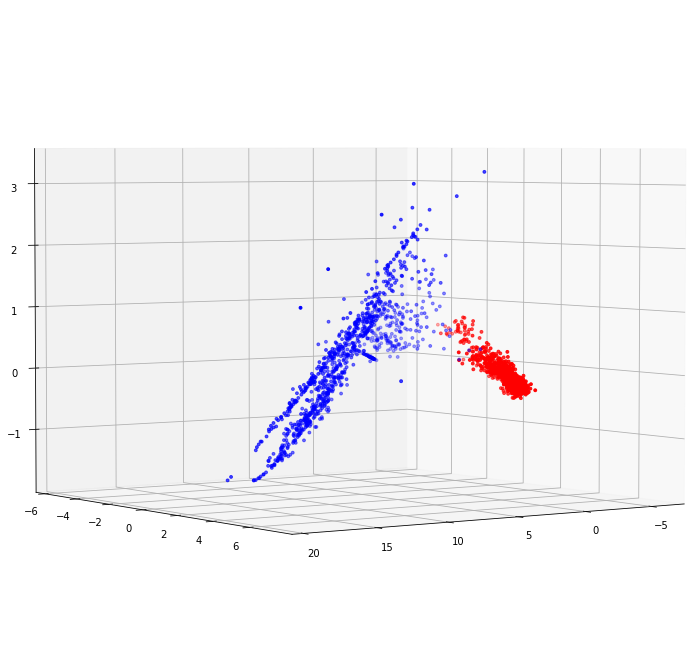

In [7]:
u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=2\
               , threshold=None, angles=(170,9,2))
plt.show()
u.latent2plot(latent_vec=latent_vec, mode="pca", dimension=2\
               , threshold=None, angles=(55,9,3))
plt.show()
u.latent2plot(latent_vec=latent_vec, mode="tsne", dimension=3\
               , threshold=None, angles=(170,9,2))
plt.show()
u.latent2plot(latent_vec=latent_vec, mode="pca", dimension=3\
               , threshold=None, angles=(55,9,3))
plt.show()

In [8]:
pkl_folder="pkl"
iphone_params_path="%s/iphone_params.pkl"%pkl_folder
samsung_params_path="%s/samsung_params.pkl"%pkl_folder
iphone_params=u.load_item(iphone_params_path)
samsung_params=u.load_item(samsung_params_path)

In [9]:
#just being lazy and turn dict into list
iphone_rec=[]
for i in iphone_params:
    iphone_rec.append(iphone_params[i])
samsung_rec=[]
for i in samsung_params:
    samsung_rec.append(samsung_params[i])

In [10]:
samsung_h,samsung_w,samsung_rl,samsung_rm,samsung_rs,samsung_m_ushift,samsung_m_lshift,\
samsung_sux,samsung_suh,samsung_slh,samsung_camera_r_h,samsung_camera_ct,samsung_camera_d,\
samsung_camera_r1,samsung_camera_r2,samsung_camera2r,samsung_ring_r,\
samsung_camera_m_h,samsung_camera_m_r,samsung_trap_u,samsung_trap_l,samsung_trap_h_ratio,\
samsung_button_h,samsung_vol_l,samsung_vol_h,samsung_bixby_l,samsung_bixby_h,samsung_power_l,\
samsung_power_free_h,samsung_power_unfree_h=\
samsung_rec

In [11]:
iphone_h,iphone_h2w_factor,iphone_w,iphone_h2fillet_factor,iphone_fillet,\
iphone_mute,iphone_mute2top,iphone_mute_h2power_factor,iphone_power,\
iphone_mute_h2power_h_factor,iphone_power2top,iphone_mute2vol,\
iphone_vol,iphone_mute_h2vol_gap_factor,iphone_vol_gap,iphone_notch_r1,\
iphone_vshift,iphone_notch_r2,iphone_notch_h,iphone_notch_w,iphone_button_t,\
iphone_scr2pl,iphone_scr_gap2edge_gap_factor,iphone_pl2edge,\
iphone_stripe_w,iphone_stripe2top,iphone_stripe_top2low_factor,\
iphone_stripe2low,iphone_stripe_ur,iphone_stripe_top2ll_factor,\
iphone_stripe_ll,iphone_ringr,iphone_ringd,iphone_ringd2,iphone_lens1,iphone_lens2,iphone_lens3,iphone_lens4,\
iphone_lens1p,iphone_lens2p,iphone_lens3p,iphone_lens4p,iphone_lens_random,iphone_notch_random=\
iphone_rec

In [12]:
iphone_feature_names=['iphone_h','iphone_h2w_factor','iphone_w',\
               'iphone_h2fillet_factor','iphone_fillet',\
'iphone_mute','iphone_mute2top','iphone_mute_h2power_factor','iphone_power',\
'iphone_mute_h2power_h_factor','iphone_power2top','iphone_mute2vol',\
'iphone_vol','iphone_mute_h2vol_gap_factor','iphone_vol_gap','iphone_notch_r1',\
'iphone_vshift','iphone_notch_r2','iphone_notch_h','iphone_notch_w','iphone_button_t',\
'iphone_scr2pl','iphone_scr_gap2edge_gap_factor','iphone_pl2edge',\
'iphone_stripe_w','iphone_stripe2top','iphone_stripe_top2low_factor',\
'iphone_stripe2low','iphone_stripe_ur','iphone_stripe_top2ll_factor',\
'iphone_stripe_ll','iphone_ringr','iphone_ringd','iphone_ringd2',\
'iphone_lens1','iphone_lens2','iphone_lens3','iphone_lens4',\
'iphone_lens1p','iphone_lens2p','iphone_lens3p','iphone_lens4p',\
'iphone_lens_random','iphone_notch_random']

In [13]:
samsung_feature_names=\
['samsung_h','samsung_w','samsung_rl','samsung_rm',\
'samsung_rs','samsung_m_ushift','samsung_m_lshift',\
'samsung_sux','samsung_suh','samsung_slh',\
'samsung_camera_r_h','samsung_camera_ct','samsung_camera_d',\
'samsung_camera_r1','samsung_camera_r2','samsung_camera2r','samsung_ring_r',\
'samsung_camera_m_h','samsung_camera_m_r',\
'samsung_trap_u','samsung_trap_l','samsung_trap_h_ratio',\
'samsung_button_h','samsung_vol_l','samsung_vol_h',\
'samsung_bixby_l','samsung_bixby_h','samsung_power_l',\
'samsung_power_free_h','samsung_power_unfree_h']

In [14]:

u.plot_separation(latent_vec, iphone_rec, iphone_feature_names, \
                dimension=2, phone="iphone", mode="tsne",\
 folder="tsne/normalized_separation/2d",normalized=1, angles=(170,9,2))

u.plot_separation(latent_vec, samsung_rec, samsung_feature_names, \
                dimension=2, phone="samsung", mode="tsne",\
 folder="tsne/normalized_separation/2d",normalized=1, angles=(170,9,2))

u.plot_separation(latent_vec, iphone_rec, iphone_feature_names, \
                dimension=2, phone="iphone", mode="pca",\
 folder="pca/normalized_separation/2d",normalized=1, angles=(55,9,3))

u.plot_separation(latent_vec, samsung_rec, samsung_feature_names, \
                dimension=2, phone="samsung", mode="pca",\
 folder="pca/normalized_separation/2d",normalized=1, angles=(55,9,3))

u.plot_separation(latent_vec, iphone_rec, iphone_feature_names, \
                dimension=3, phone="iphone", mode="tsne",\
 folder="tsne/normalized_separation/3d",normalized=1, angles=(170,9,2))

u.plot_separation(latent_vec, samsung_rec, samsung_feature_names, \
                dimension=3, phone="samsung", mode="tsne",\
 folder="tsne/normalized_separation/3d",normalized=1, angles=(170,9,2))

u.plot_separation(latent_vec, iphone_rec, iphone_feature_names, \
                dimension=3, phone="iphone", mode="pca",\
 folder="pca/normalized_separation/3d",normalized=1, angles=(55,9,3))

u.plot_separation(latent_vec, samsung_rec, samsung_feature_names, \
                dimension=3, phone="samsung", mode="pca",\
 folder="pca/normalized_separation/3d",normalized=1, angles=(55,9,3))